https://www.safaribooksonline.com/library/view/machine-learning-for/9781783980284/883b9e5f-46c5-4030-8d7a-ce2db7f2bd32.xhtml

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection as ms
import cv2
from sklearn import metrics
%matplotlib inline

In [2]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=7816)

Text(0,0.5,'y values')

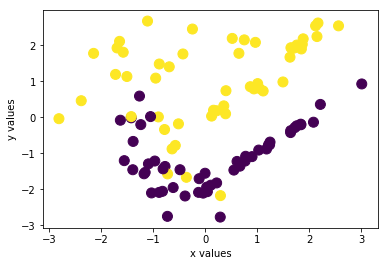

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel('x values')
plt.ylabel('y values')

The next step is to split the data points into training and test sets, as we have done before. But, before we do that, we have to prepare the data for OpenCV:

All feature values in X must be 32-bit floating point numbers
Target labels must be either -1 or +1


In [4]:
X = X.astype(np.float32)
y = y * 2 - 1

In [5]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
_, y_pred = svm.predict(X_test)

In [7]:
metrics.accuracy_score(y_test, y_pred)

0.80000000000000004

In [8]:
def plot_decision_boundary(svm, X_test, y_test):
    #find lowest x (leftmost) and highest x (rightmost) then pad so don't go over
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    #do the same for y
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    
    h = 0.02  # step size in mesh...          
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    X_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),yy.ravel().astype(np.float32)]
    _, zz = svm.predict(X_hypo)
    _, zz = svm.predict(X_hypo)